# Exploratory Data Analysis on BaseBall

Essential key steps to demonstrate in your Python Notebook
1. Loading data in to DataFrames. (Integration of SQL and Python if required)
2. Check the Data Types of your data columns.
3. Drop any NULL, missing values or unwanted columns.
4. Drop duplicate values.
5. Check for outliers using a box plot or histogram.
6. Plot features against each other using a pair plot.
7. Use a HeatMap for finding the correlation between the features(Feature to Feature).
8. Use a scatter plot to show the relationship between 2 variables.
9. Merging two Data Frames.
10. Slicing Data of a particular column value (like year, month, filter values depending on the categorical data)
11. Representing data in matrix form.
12. Upload data to Numerical Python (NumPy)
13. Select a slice or part of the data and display.
14. Use conditions and segregate the data based on the condition (like show data of a feature(column) >,<,= a number)
15. Use mathematical and statistical functions using libraries.
16. Select data based on a category(categorical data based).
17. Libraries expected to try(minimum 4 required): Pandas, Numpy, Seaborn, Matplotlib .
18. Write your own functions and handle exceptions in the functions. 
19. Use of *arg and **kwargs.
20. Use of data functions. 
21. Create classes.

## 1. Problem Statement  <a class="anchor" id="section1">
In this python notebook, analysis of BaseBall matches from 2008 to 2020 is done using python packages like pandas, matplotlib and seaborn.  We have conducted an exploratory data analysis on two different datasets, for the purpose of determining what factors may have an impact on a teams chances of winning.  The factors we chose to analyze are as follows: Win rate, number of games played, result of the pre-game coin toss, and the venue.  We were also curious to know about additional factors, such as: highest performing players. 

## 2. Data Loading and Description <a class="anchor" id="section2">

**Some Background Information**

Major League Baseball (MLB) is a professional baseball league in the United States and some parts of Canada contested from April to October of every year
by teams representing U.S. cities from 2008 to 2020. The dataset that we use in this notebook is BaseBall Matches 2008-2020.csv

**Importing Packages**

In [166]:
import numpy as np                  # Implemennts multi-dimensional array and matrices
import pandas as pd                 # For data manipulation and analysis
import matplotlib.pyplot as plt     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

# To be added in our 2nd file
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

In [167]:
import os
import BaseballMethods

**Importing the Dataset**

In [168]:
try:
  ball_by_ball = pd.read_csv("BaseBall Ball-by-Ball 2008-2020.csv")
except ValueError:
  print("file not found in directory")
ball_by_ball.head(2)


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,David Peterson,Ian Happ,Kodai Senga,1.0,0,1,0,0,NaN,NaN,NaN,NaN,New York Mets,Chicago Cubs
1,335982,1,6,6,Ian Happ,David Peterson,Kodai Senga,1.0,0,1,0,0,NaN,NaN,NaN,NaN,New York Mets,Chicago Cubs


In [169]:
try:
  matches_data = pd.read_csv("BaseBall Matches 2008-2020.csv")

except ValueError:
  print("file not found in directory")
matches_data.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,"Queens, New York",2008-04-18,BB McCullum,Citi Field,0,New York Mets,Chicago Cubs,New York Mets,field,Chicago Cubs,runs,140.0,N,NaN,John Bacon,RE Koertzen
1,335983,Philadelphia,2008-04-19,MEK Hussey,Citizens Bank Park,0,Philadelphia Phillies,San Francisco Giants,San Francisco Giants,bat,San Francisco Giants,runs,33.0,N,NaN,MR Benson,SL Shastri


In [170]:
print(f"This Dataset have {ball_by_ball.shape[0]} rows and {ball_by_ball.shape[1]} columns.")

This Dataset have 193468 rows and 18 columns.


In [171]:
print(f"This Dataset have {matches_data.shape[0]} rows and {matches_data.shape[1]} columns.")

This Dataset have 816 rows and 17 columns.


## 3. Data Profiling

- __understanding our dataset__ using various pandas functionalities.
- __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 - Understanding the Dataset

Observing few rows and columns of data both from the starting and from the end


In [172]:
ball_by_ball.shape

(193468, 18)

BaseBall matches ball by ball has 193468 rows and 18 columns

In [173]:
matches_data.shape

(816, 17)

BaseBall matches data has 816 rows and 17 columns

In [174]:
ball_by_ball.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [175]:
matches_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [176]:
ball_by_ball.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,David Peterson,Ian Happ,Kodai Senga,1.0,0,1,0,0,NaN,NaN,NaN,NaN,New York Mets,Chicago Cubs
1,335982,1,6,6,Ian Happ,David Peterson,Kodai Senga,1.0,0,1,0,0,NaN,NaN,NaN,NaN,New York Mets,Chicago Cubs
2,335982,1,7,1,Ian Happ,David Peterson,Justin Verlander,0.0,0,0,0,0,NaN,NaN,NaN,NaN,New York Mets,Chicago Cubs


In [177]:
matches_data.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,"Queens, New York",2008-04-18,BB McCullum,Citi Field,0,New York Mets,Chicago Cubs,New York Mets,field,Chicago Cubs,runs,140.0,N,NaN,John Bacon,RE Koertzen
1,335983,Philadelphia,2008-04-19,MEK Hussey,Citizens Bank Park,0,Philadelphia Phillies,San Francisco Giants,San Francisco Giants,bat,San Francisco Giants,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Washington DC,2008-04-19,MF Maharoof,Nationals Park,0,Washington Nationals,Milwaukee Brewers,Milwaukee Brewers,bat,Washington Nationals,wickets,9.0,N,NaN,Ryan Additon,GA Pratapkumar


In [178]:
ball_by_ball.tail(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
193465,1237181,1,13,1,Aaron Ashby,Keston Hiura,Noah Pandya,0.0,1,1,0,0,NaN,NaN,NaN,wides,Milwaukee Brewers,Cincinnati Reds
193466,1237181,1,13,2,Aaron Ashby,Keston Hiura,Noah Pandya,1.0,0,1,0,0,NaN,NaN,NaN,NaN,Milwaukee Brewers,Cincinnati Reds
193467,1237181,1,13,3,Aaron Ashby,Keston Hiura,Noah Pandya,1.0,0,1,0,0,NaN,NaN,NaN,NaN,Milwaukee Brewers,Cincinnati Reds


In [179]:
matches_data.tail(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
813,1237178,Phoenix,2020-11-06,KS Williamson,Chase Field,0,New York Mets,Tampa Bay Rays,Tampa Bay Rays,field,Tampa Bay Rays,wickets,6.0,N,NaN,PR Reiffel,Doug Eddings
814,1237180,Phoenix,2020-11-08,MP Stoinis,Chase Field,0,Los Angeles Dodgers,Tampa Bay Rays,Los Angeles Dodgers,bat,Los Angeles Dodgers,runs,17.0,N,NaN,PR Reiffel,Doug Eddings
815,1237181,Anaheim,2020-11-10,TA Boult,Angel Stadium,0,Los Angeles Dodgers,Atlanta Braves,Los Angeles Dodgers,bat,Atlanta Braves,wickets,5.0,N,NaN,Vic Carapazza,Nitin Menon


In [180]:
ball_by_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                193468 non-null  int64  
 1   inning            193468 non-null  int64  
 2   over              193468 non-null  int64  
 3   ball              193468 non-null  int64  
 4   batsman           193468 non-null  object 
 5   non_striker       193468 non-null  object 
 6   bowler            193468 non-null  object 
 7   batsman_runs      193467 non-null  float64
 8   extra_runs        193468 non-null  int64  
 9   total_runs        193468 non-null  int64  
 10  non_boundary      193468 non-null  int64  
 11  is_wicket         193468 non-null  int64  
 12  dismissal_kind    9495 non-null    object 
 13  player_dismissed  9495 non-null    object 
 14  fielder           6784 non-null    object 
 15  extras_type       10233 non-null   object 
 16  batting_team      19

In [181]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [182]:
ball_by_ball.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193467.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240227,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610870,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [183]:
matches_data.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


### 3.2 - Preprocessing

In [184]:
#checking null values
BaseballMethods.find_null_values(ball_by_ball)

No of Null Values: 738057


In [185]:
##checking null values
BaseballMethods.find_null_values(matches_data)

No of Null Values: 843


- Dealing with missing values<br/>
    - Replacing missing entries of __City__ from the Venue Column.
    - Replacing repeated values
    - Replace city Philadelphia to Philly

In [186]:
matches_data.columns.unique()

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

replacing all values with same name 

In [187]:
#Replacing
BaseballMethods.replace_values_for_consistency(matches_data)
matches_data.head(2)

       id              city        date player_of_match               venue  \
0  335982  Queens, New York  2008-04-18     BB McCullum          Citi Field   
1  335983            Philly  2008-04-19      MEK Hussey  Citizens Bank Park   

   neutral_venue                  team1                 team2  \
0              0          New York Mets          Chicago Cubs   
1              0  Philadelphia Phillies  San Francisco Giants   

            toss_winner toss_decision                winner result  \
0         New York Mets         field          Chicago Cubs   runs   
1  San Francisco Giants           bat  San Francisco Giants   runs   

   result_margin eliminator method     umpire1      umpire2  
0          140.0          N    NaN  John Bacon  RE Koertzen  
1           33.0          N    NaN   MR Benson   SL Shastri  


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,"Queens, New York",2008-04-18,BB McCullum,Citi Field,0,New York Mets,Chicago Cubs,New York Mets,field,Chicago Cubs,runs,140.0,N,NaN,John Bacon,RE Koertzen
1,335983,Philly,2008-04-19,MEK Hussey,Citizens Bank Park,0,Philadelphia Phillies,San Francisco Giants,San Francisco Giants,bat,San Francisco Giants,runs,33.0,N,NaN,MR Benson,SL Shastri


**Replacing Null values in CITY column from VENUE**

In [188]:
BaseballMethods.replace_values_for_consistency(matches_data)
matches_data.head(10)


       id              city        date player_of_match               venue  \
0  335982  Queens, New York  2008-04-18     BB McCullum          Citi Field   
1  335983            Philly  2008-04-19      MEK Hussey  Citizens Bank Park   

   neutral_venue                  team1                 team2  \
0              0          New York Mets          Chicago Cubs   
1              0  Philadelphia Phillies  San Francisco Giants   

            toss_winner toss_decision                winner result  \
0         New York Mets         field          Chicago Cubs   runs   
1  San Francisco Giants           bat  San Francisco Giants   runs   

   result_margin eliminator method     umpire1      umpire2  
0          140.0          N    NaN  John Bacon  RE Koertzen  
1           33.0          N    NaN   MR Benson   SL Shastri  


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,"Queens, New York",2008-04-18,BB McCullum,Citi Field,0,New York Mets,Chicago Cubs,New York Mets,field,Chicago Cubs,runs,140.0,N,NaN,John Bacon,RE Koertzen
1,335983,Philly,2008-04-19,MEK Hussey,Citizens Bank Park,0,Philadelphia Phillies,San Francisco Giants,San Francisco Giants,bat,San Francisco Giants,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Washington DC,2008-04-19,MF Maharoof,Nationals Park,0,Washington Nationals,Milwaukee Brewers,Milwaukee Brewers,bat,Washington Nationals,wickets,9.0,N,NaN,Ryan Additon,GA Pratapkumar
3,335985,Cumberland,2008-04-20,Ronald Acuña Jr.,Truist Park,0,Atlanta Braves,New York Mets,Atlanta Braves,Hit,New York Mets,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Chicago,2008-04-20,DJ Hussey,Guaranteed Rate Field,0,Chicago Cubs,Miami Marlins,Miami Marlins,bat,Chicago Cubs,wickets,5.0,N,NaN,Scott Barry,K Hariharan
5,335987,Milwaukee,2008-04-21,SR Watson,American Family Field,0,Milwaukee Brewers,Philadelphia Phillies,Philadelphia Phillies,bat,Milwaukee Brewers,wickets,6.0,N,NaN,Ryan Additon,RB Tiffin
6,335988,Cumberland,2008-04-22,V Sehwag,Truist Park,0,Miami Marlins,Washington Nationals,Miami Marlins,bat,Washington Nationals,wickets,9.0,N,NaN,Kerwin Danley,AM Saheba
7,335989,Detroit,2008-04-23,ML Hayden,Comerica Park,0,San Francisco Giants,Atlanta Braves,Atlanta Braves,field,San Francisco Giants,runs,6.0,N,NaN,Chris Conroy,GA Pratapkumar
8,335990,Pittsburgh,2008-04-24,YK Pathan,PNC Park,0,Miami Marlins,Milwaukee Brewers,Milwaukee Brewers,field,Milwaukee Brewers,wickets,3.0,N,NaN,John Bacon,MR Benson
9,335991,Philly,2008-04-25,KC Sangakkara,Citizens Bank Park,0,Philadelphia Phillies,Atlanta Braves,Atlanta Braves,field,Philadelphia Phillies,runs,66.0,N,NaN,Ryan Additon,AM Saheba


**Missing values of winner and player_of_match columns.**

In [189]:
matches_data[matches_data['winner'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Washington DC,2011-05-21,NaN,Nationals Park,0,Washington Nationals,Washington Nationals,Washington Nationals,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,Andy Fletcher
486,829763,"Queens, New York",2015-04-29,NaN,Citi Field,0,New York Mets,Milwaukee Brewers,Milwaukee Brewers,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,"Queens, New York",2015-05-17,NaN,Citi Field,0,New York Mets,Washington Nationals,New York Mets,field,NaN,NaN,NaN,NaN,NaN,Kerwin Danley,K Srinivasan
744,1178424,Bronx,2019-04-30,NaN,Yankee Stadium,0,New York Mets,Milwaukee Brewers,Milwaukee Brewers,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


As the matches had no result these columns would have been left blank and no need to replace with any values.

**Replace city Philadeplhia to Philly**

In [190]:
matches_data.replace( 'Philadelphia', 'Philly',inplace = True)
matches_data['city'].unique()

array(['Queens, New York', 'Philly', 'Washington DC', 'Cumberland',
       'Chicago', 'Milwaukee', 'Detroit', 'Pittsburgh', 'Kansas City',
       'Baltimore', 'Toronto', 'Miami', 'Los Angeles', 'Arlington',
       'St. Louis, Missouri', 'San Francisco', 'Anaheim', 'Cincinnati',
       'Denver', 'St. Petersburg', 'San Diego', 'Oakland', 'Phoenix', nan,
       'Cleveland', 'Boston', 'Bronx', 'Seattle'], dtype=object)

### 3.3 - Post Profiling<a class="anchor" id="section304">

In [191]:
#display team names and column names
BaseballMethods.display_post_profiling(matches_data)

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')
['New York Mets' 'Philadelphia Phillies' 'Washington Nationals'
 'Atlanta Braves' 'Chicago Cubs' 'Milwaukee Brewers' 'Miami Marlins'
 'San Francisco Giants' 'Arizona Diamondbacks' 'Tampa Bay Rays'
 'Houston Astros' 'Cleveland Guardians Supergiants'
 'Cleveland Guardians Supergiant' 'Los Angeles Dodgers']


##4. Questions

### 4.1 - Total matches played by each team  <a class="anchor" id="section403">

In [192]:
matches_played = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
matches_played


Arizona Diamondbacks                14
Atlanta Braves                     203
Chicago Cubs                       192
Cleveland Guardians Supergiant      16
Cleveland Guardians Supergiants     14
Houston Astros                      30
Los Angeles Dodgers                 33
Miami Marlins                       75
Milwaukee Brewers                  161
New York Mets                      195
Philadelphia Phillies              190
San Francisco Giants               178
Tampa Bay Rays                     124
Washington Nationals               207
dtype: int64

### 4.2 - How many matches won by each team ?  <a class="anchor" id="section404">

In [193]:
matches_won = matches_data.groupby('winner').count()
matches_won["id"]

winner
Arizona Diamondbacks                 6
Atlanta Braves                     120
Chicago Cubs                        99
Cleveland Guardians Supergiant      10
Cleveland Guardians Supergiants      5
Houston Astros                      13
Los Angeles Dodgers                 19
Miami Marlins                       29
Milwaukee Brewers                   81
New York Mets                       91
Philadelphia Phillies               88
San Francisco Giants               106
Tampa Bay Rays                      66
Washington Nationals                79
Name: id, dtype: int64

### 4.3 - Comparison between Number of matches won by each team and total matches played <a class="anchor" id="section405">

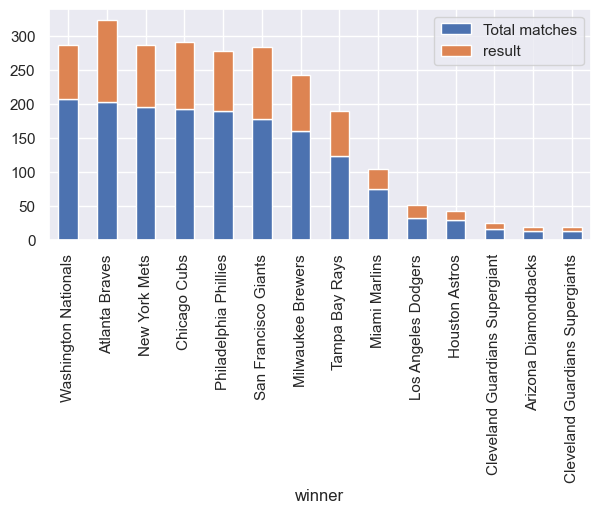

In [194]:
BaseballMethods.matches_won_total_matches(matches_data, matches_won, matches_played)

### 4.4 - Success Rate of each team <a class="anchor" id="section406">

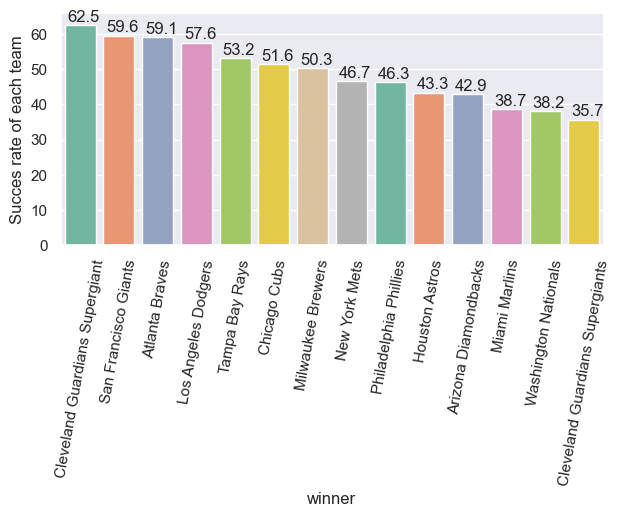

In [195]:
match_succes_rate = (matches_won["id"]/matches_played)*100
#print(match_succes_rate)

data = match_succes_rate.sort_values(ascending = False)
plt.figure(figsize=(7,3))
ax = sns.barplot(x = data.index, y = data, palette="Set2");
plt.ylabel('Succes rate of each team')
plt.xticks(rotation=80)
annot_plot(ax,0.08,1)


__Cleveland Guardians Supergiant__ have highest winning success rate __(62.5%)__ , followed by San Francisco Giants __(59.6%)__.  Without doing a full statistical analysis, it seems clear that the teams that play more games tend to have a higher win percentage. 

### 4.5 - Top 10 high performing Players <a class="anchor" id="section415">

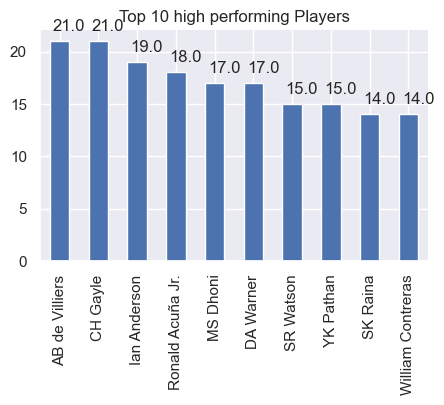

In [196]:
plt.figure(figsize=(5,3))

ax = matches_data['player_of_match'].value_counts()[:10].plot.bar()
plt.title('Top 10 high performing Players')
annot_plot(ax,0.08,1)

__AB de Villers__ has won Player of the match  __23__ times followed by  __CH Gayle__ who had won __22__ times.

### 4.6 - Toss winning success rate of each team <a class="anchor" id="section416">

Text(0.5, 1.0, 'Toss winning success rate of each team')

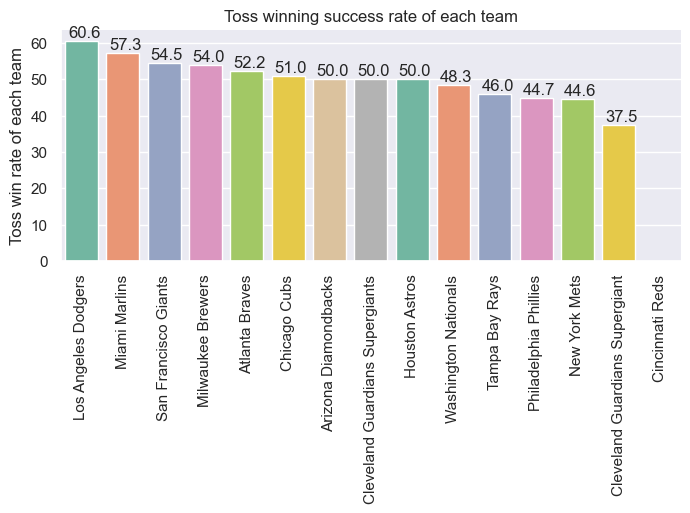

In [197]:
toss_won = matches_data['toss_winner'].value_counts()
toss_win_rate = (toss_won/matches_played)*100
data = toss_win_rate.sort_values(ascending = False)
plt.figure(figsize=(8,3))
ax = sns.barplot(x = data.index, y = data, palette="Set2");
plt.ylabel('Toss win rate of each team')
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)
plt.title('Toss winning success rate of each team')

__Los Angeles Dodgers__ has the highest Toss winning success rate of __60.6%__ and __Cleveland Guardians Supergiant__ has the least toss winning success rate of __37.5%__.

### 4.7 - Checking Corelation in Ball By Ball database <a class="anchor" id="section406">

In [198]:
corelation = ball_by_ball.corr()

<AxesSubplot:>

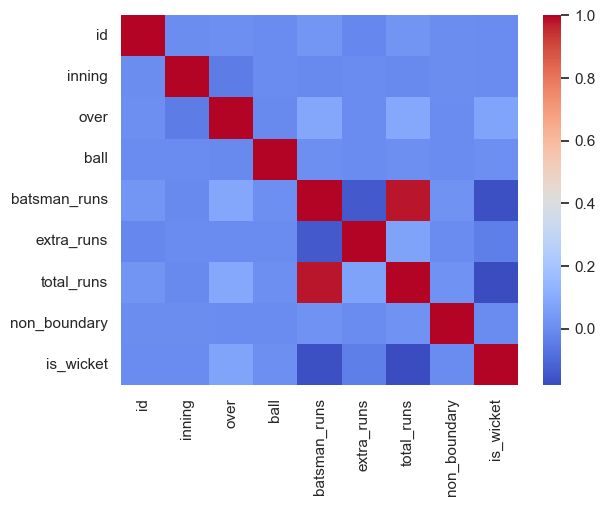

In [199]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, cmap="coolwarm")


###4.8 - Most Runs Scored

In [200]:
most_runs = ball_by_ball.groupby(['id'])['total_runs'].sum().reset_index()

# Ascending Order
BaseballMethods.runs_scored_ascending(most_runs)

# Descending Order
BaseballMethods.runs_scored_descending(most_runs)

          id  total_runs
241   501265          56
744  1178424         103
39    336021         135
611  1082626         135
411   729305         141
..       ...         ...
1     335983         447
791  1216527         449
626  1082641         453
679  1136604         459
146   419137         469

[816 rows x 2 columns]
          id  total_runs
146   419137         469
679  1136604         459
626  1082641         453
791  1216527         449
1     335983         447
..       ...         ...
411   729305         141
611  1082626         135
39    336021         135
744  1178424         103
241   501265          56

[816 rows x 2 columns]


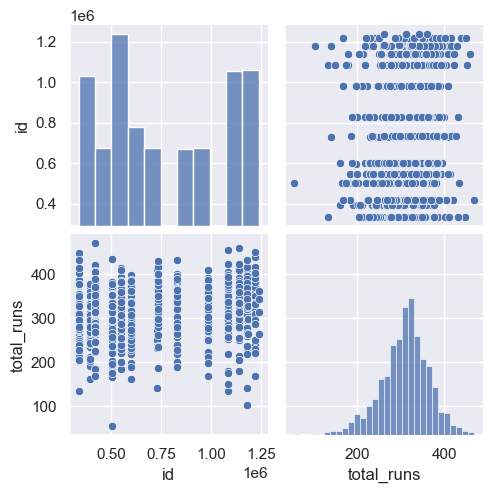

In [201]:
sns.pairplot(most_runs)

### 4.9 - Toss Decision across matches <a class="anchor" id="section417">

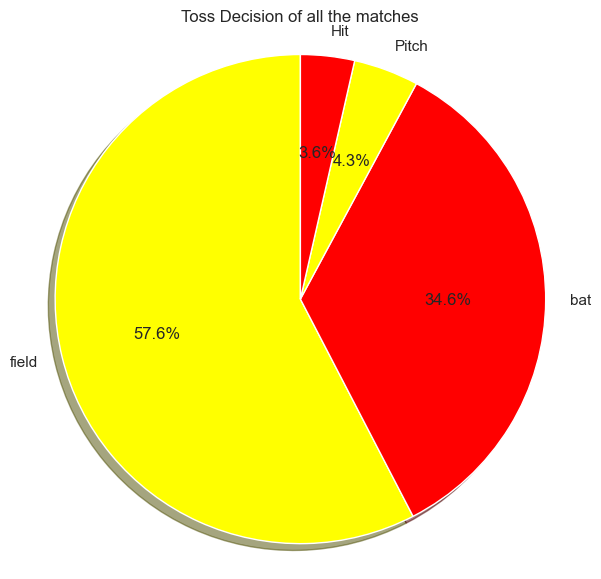

In [202]:
toss=matches_data['toss_decision'].value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['yellow', 'red']

# Plot
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Decision of all the matches')
plt.axis('equal')
plt.show()

__57.6%__ of the toss winning teams have opted for __Feilding__ while __34.6%__ have opted for __Batting__.

### 4.10 - How toss winning affects the match winner <a class="anchor" id="section420">

In [203]:
tosswin_win = matches_data['id'][matches_data['toss_winner'] == matches_data['winner']].count()
total_matches=matches_data['id'].count()
Success_rate = ((matches_data[matches_data['toss_winner'] == matches_data['winner']].count())/(total_matches))*100

print("Number of matches in which Toss winner is the game winner is :",tosswin_win, "out of",total_matches," ie.,", Success_rate["id"],"%" )


Number of matches in which Toss winner is the game winner is : 420 out of 816  ie., 51.470588235294116 %


###  4.11 - Toss Decision  in which Toss winner is the game winner<a class="anchor" id="section421">

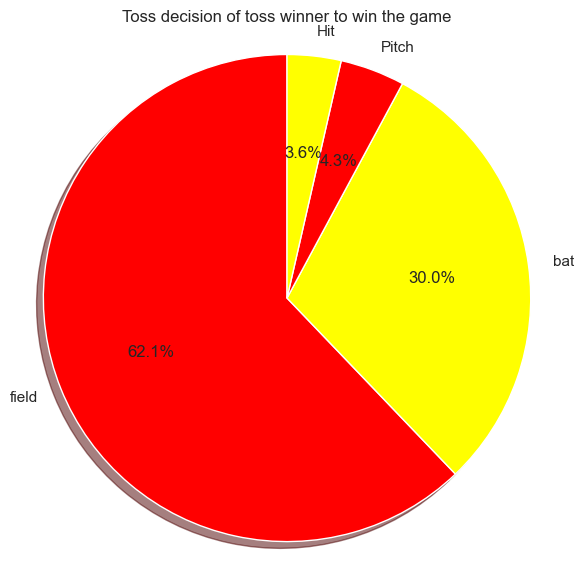

In [204]:
tosswin_winner = matches_data['toss_decision'][matches_data['toss_winner'] == matches_data['winner']].value_counts()
labels=np.array(tosswin_winner.index)
sizes = tosswin_winner.values
colors = ['red', 'yellow']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss decision of toss winner to win the game')
plt.axis('equal')
plt.show()

__62.1%__ of the toss winning teams had decided to __field__ first while __30.0%__ had decided to __Bat__ first and won the matches.

### 4.12 - Top 10 Cities to hold match <a class="anchor" id="section422">

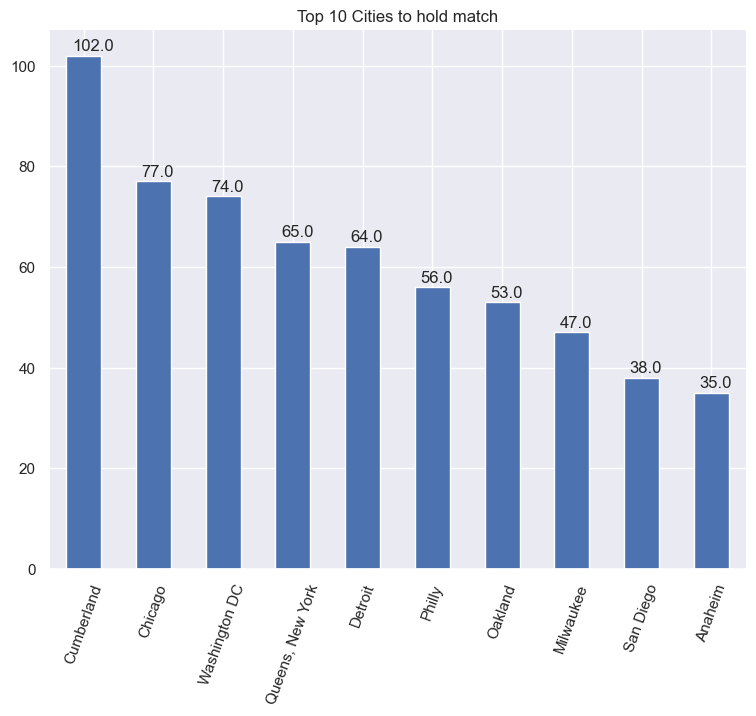

In [205]:
plt.figure(figsize=(9,7))

ax=matches_data['city'].value_counts()[:10].plot.bar()
plt.title('Top 10 Cities to hold match')
plt.xticks(rotation=70)
annot_plot(ax,0.08,1)

<AxesSubplot:ylabel='city'>

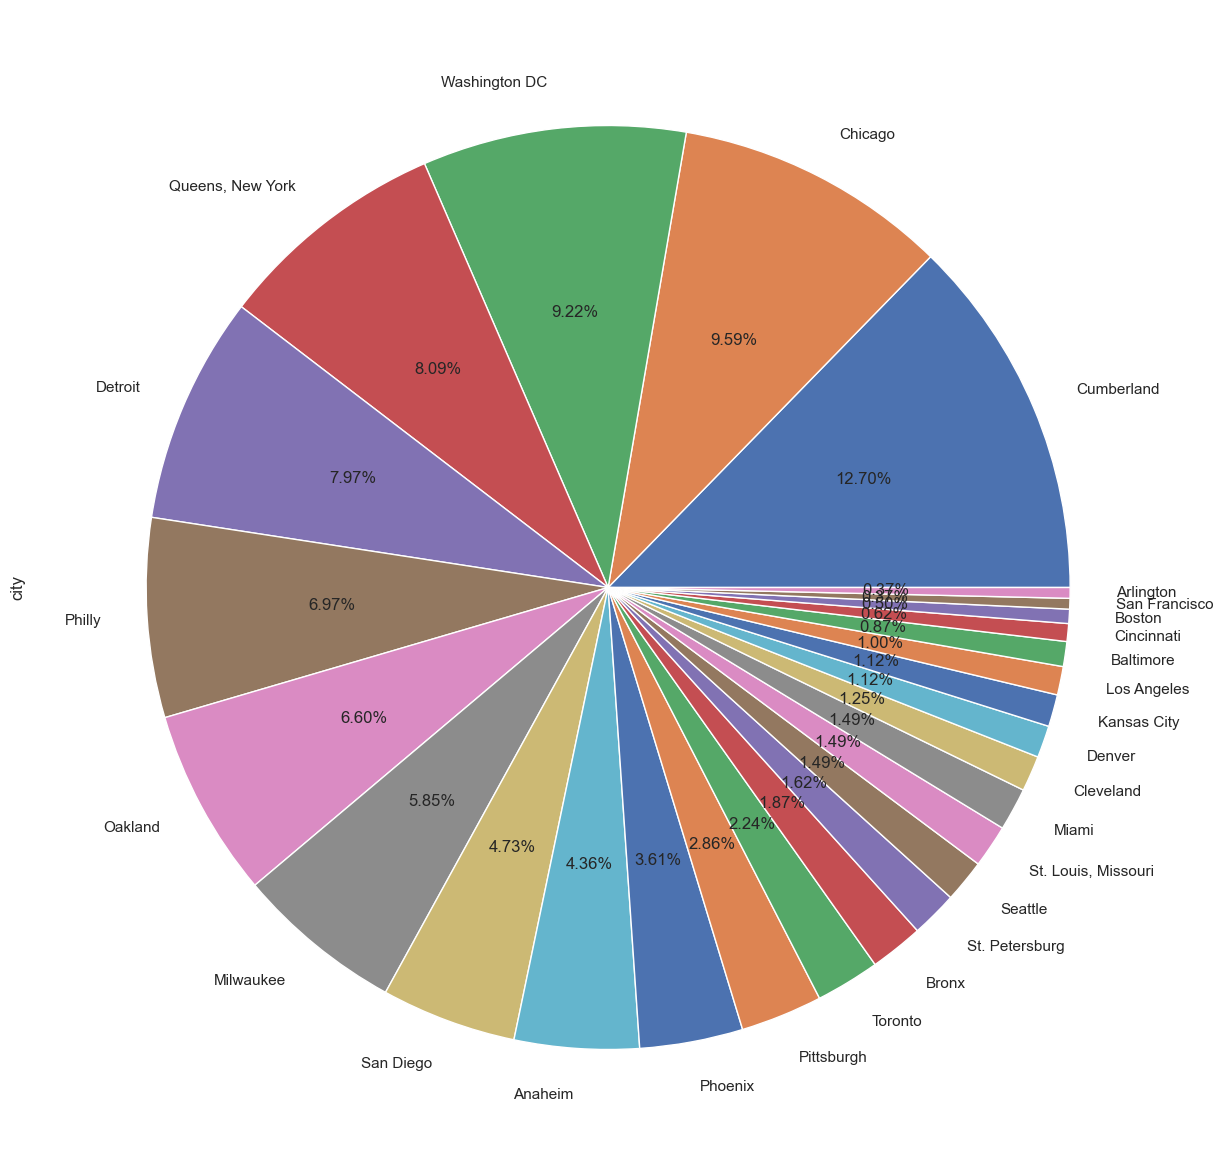

In [206]:
plt.figure(figsize=(30,15))
matches_data['city'].value_counts().plot.pie(autopct="%0.2f%%")

__Cumberland__ had hold highest number of matches (__101.0__) followed by __Chicago (80.0)__.

### 4.13 - In which city does each team has won more matches ?<a class="anchor" id="section423">

In [207]:
a = matches_data.groupby(['winner','city']).size().reset_index(name='win_counts')
a = a.sort_values("win_counts",ascending=False)
a.groupby("winner").head(1)

,winner,city,win_counts
10,Atlanta Braves,Cumberland,53
29,Chicago Cubs,Chicago,45
155,San Francisco Giants,Detroit,40
93,Milwaukee Brewers,Milwaukee,32
174,Tampa Bay Rays,Oakland,31
139,Philadelphia Phillies,Philly,30
121,New York Mets,"Queens, New York",29
204,Washington Nationals,Washington DC,28
48,Cleveland Guardians Supergiant,San Diego,5
75,Miami Marlins,Detroit,5


Teams had won more matches in their home grounds.

### 4.14 - Top 10 venue to hold matches <a class="anchor" id="section424">

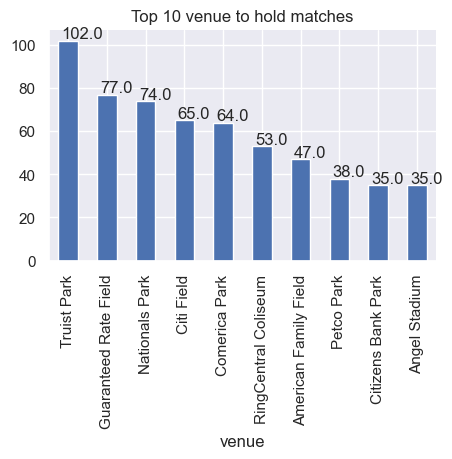

In [208]:
#top 10 venue to hold max number of matches
plt.figure(figsize=(5,3))
venue=matches_data.groupby('venue')["id"].count()
ax =venue.sort_values(ascending=False).head(10).plot.bar(figsize=(5,3))
plt.title('Top 10 venue to hold matches')
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)

<AxesSubplot:xlabel='count', ylabel='venue'>

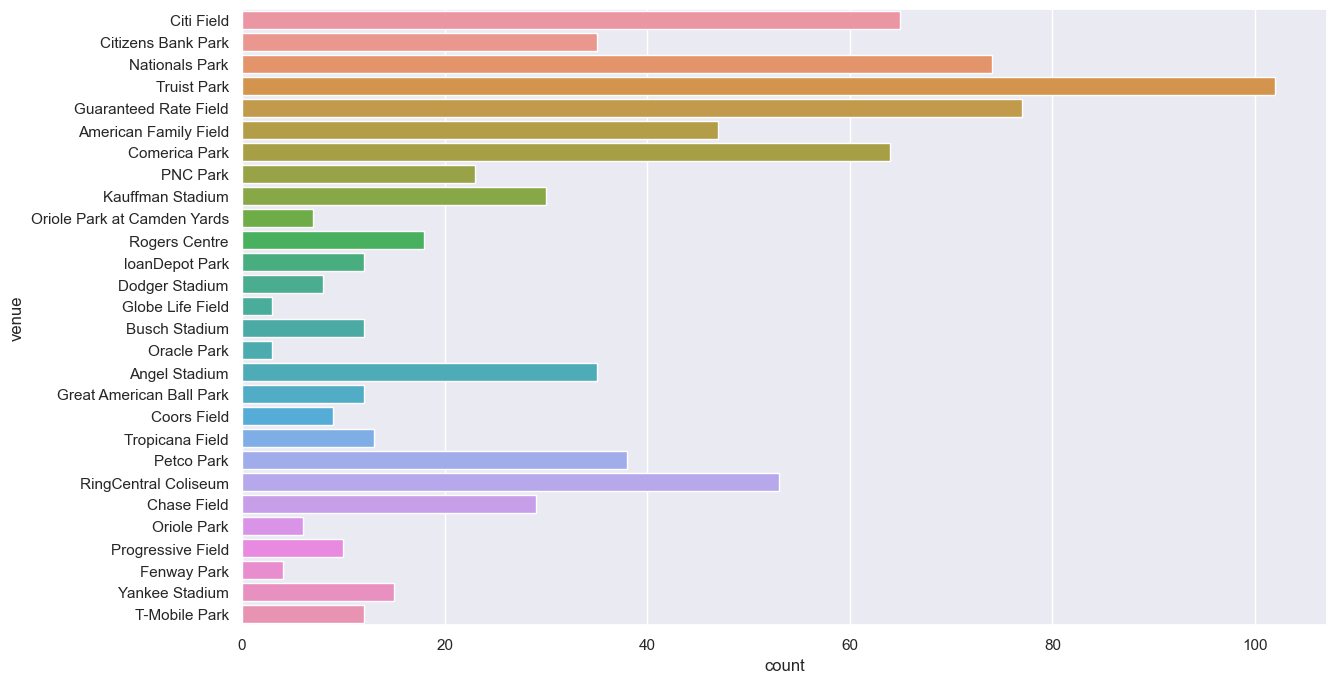

In [209]:
plt.figure(figsize=(14,8))
sns.countplot(y = 'venue',data = matches_data)

__Truist Park__ had hold highest number of matches (__77.0__) followed by __Nationals Park (74.0)__.

### 4.15 - Identify if each Venue is Best Suited to opt for batting or fielding based on previous matches won on that venue <a class="anchor" id="section425">

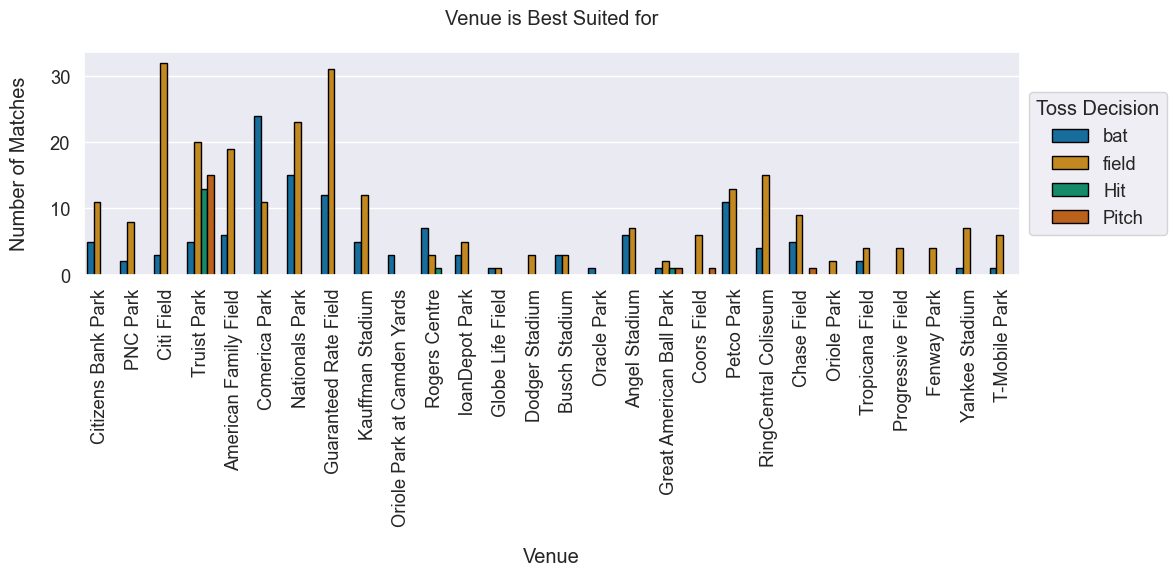

In [210]:
# Increase font size
sns.set(font_scale=1.2)

# Filter matches where toss winner was also overall winner
venue_suit_for = matches_data[matches_data['toss_winner'] == matches_data['winner']]

# Create countplot with extra spacing between bars and axes
plt.figure(figsize=(12, 6))
sns.countplot(x='venue', hue='toss_decision', data=venue_suit_for, 
              palette='colorblind', edgecolor='black', linewidth=1)
plt.xlabel('Venue', labelpad=15)
plt.ylabel('Number of Matches', labelpad=15)
plt.title('Venue is Best Suited for', pad=20)
plt.xticks(rotation=90)

# Add legend outside of plot area
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Toss Decision')
plt.tight_layout()


__Citi Field stadium and Guaranteed Rate Field Stadium__ are best Suited for Fielding and __Comerica Park__ is best suited for Batting.

### 4.16 - Match Results : Normal , tie and no result <a class="anchor" id="section426">

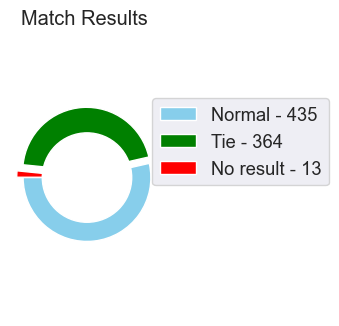

In [211]:
result=matches_data['result'].value_counts().tolist()
names='Normal - '+str(result[0]), 'Tie - '+str(result[1]), 'No result - '+str(result[2]), 

fig, ax = plt.subplots(figsize=(3.5,3.5))  
# Create a pieplot
explode = (0, 0.01, 0.01)
ax1,text=ax.pie(result,labeldistance=2,explode=explode,radius=0.1, startangle=180,colors=['skyblue','green','red'])
#plt.show()
ax.axis('equal')
ax.set_title("Match Results") 

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.07, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(ax1, names,  bbox_to_anchor=(.9,.8), loc=2)
plt.tight_layout()
plt.show()

### 4.17 - Combining 2 Data Frames

In [212]:
BaseBallData = ball_by_ball[['id']].merge(matches_data, left_on = 'id',right_on = 'id',how = 'left')
BaseBallData.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,"Queens, New York",2008-04-18,BB McCullum,Citi Field,0,New York Mets,Chicago Cubs,New York Mets,field,Chicago Cubs,runs,140.0,N,NaN,John Bacon,RE Koertzen
1,335982,"Queens, New York",2008-04-18,BB McCullum,Citi Field,0,New York Mets,Chicago Cubs,New York Mets,field,Chicago Cubs,runs,140.0,N,NaN,John Bacon,RE Koertzen


### 4.18 - Runs Vs Wickets in combined Data Frame

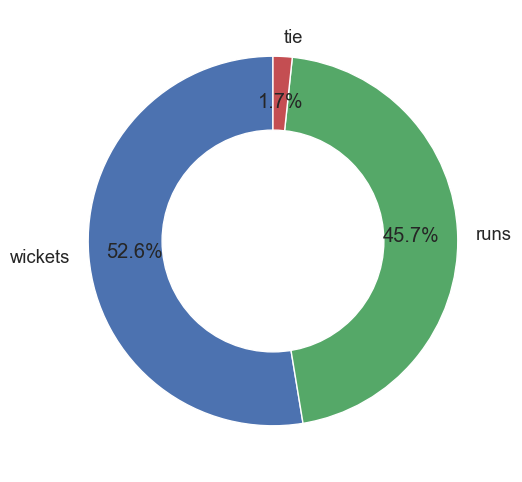

In [213]:
plt.figure(figsize=(6,6))
sizes = BaseBallData.result.value_counts()
labels = BaseBallData.result.value_counts().index
plt.pie(sizes,colors = ['b','g','r'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         )

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### 4.19 - Histogram and PairPlot in Data Frames

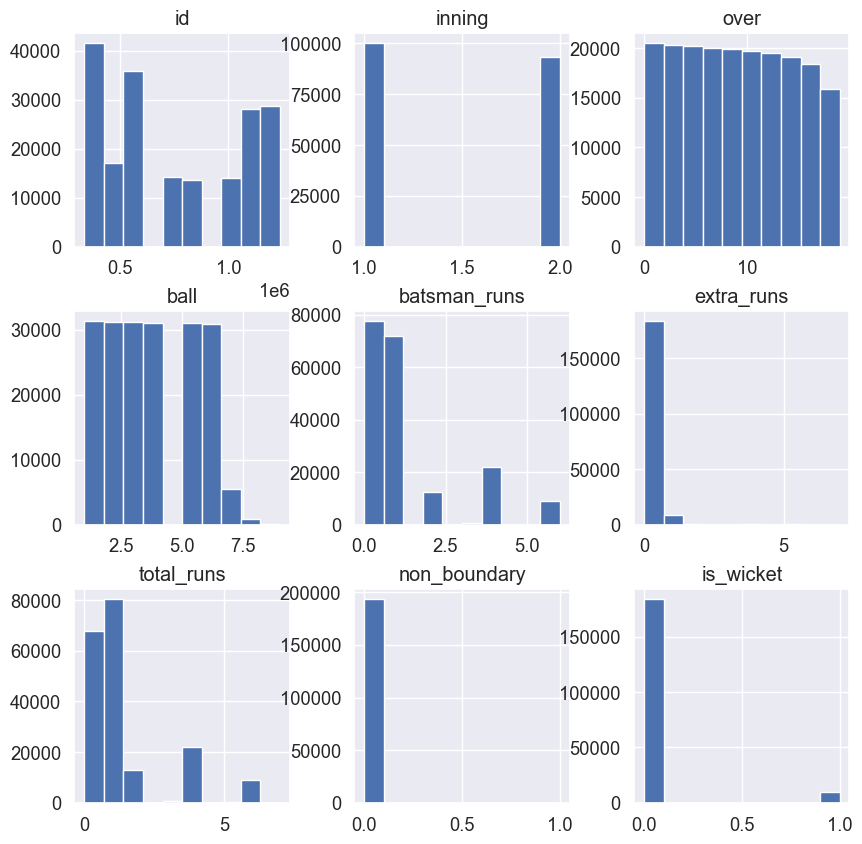

In [214]:
ball_by_ball.hist(figsize=(10,10))
plt.show()

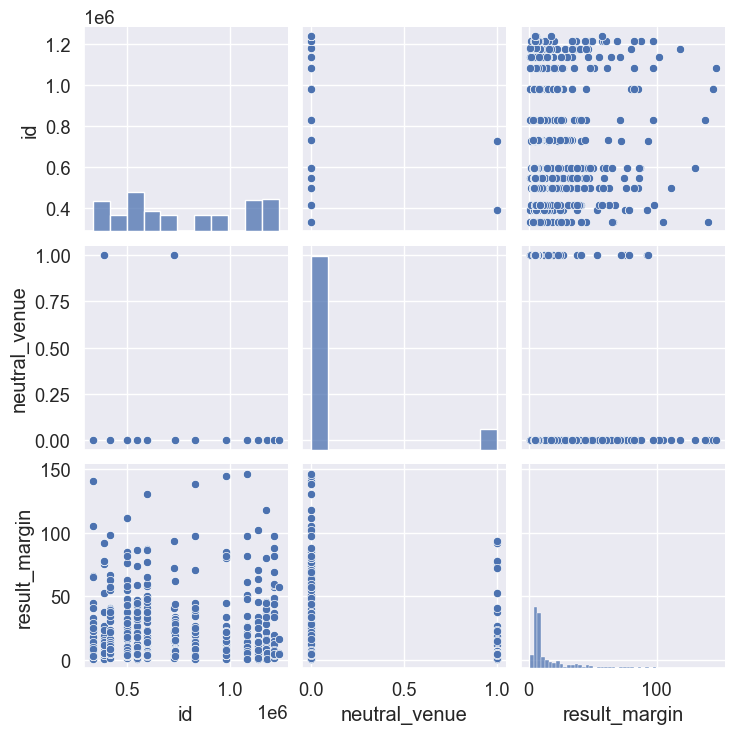

In [215]:
sns.pairplot(matches_data)

### 4.20 - Co-Relation Matrix Graph for Data Frame 

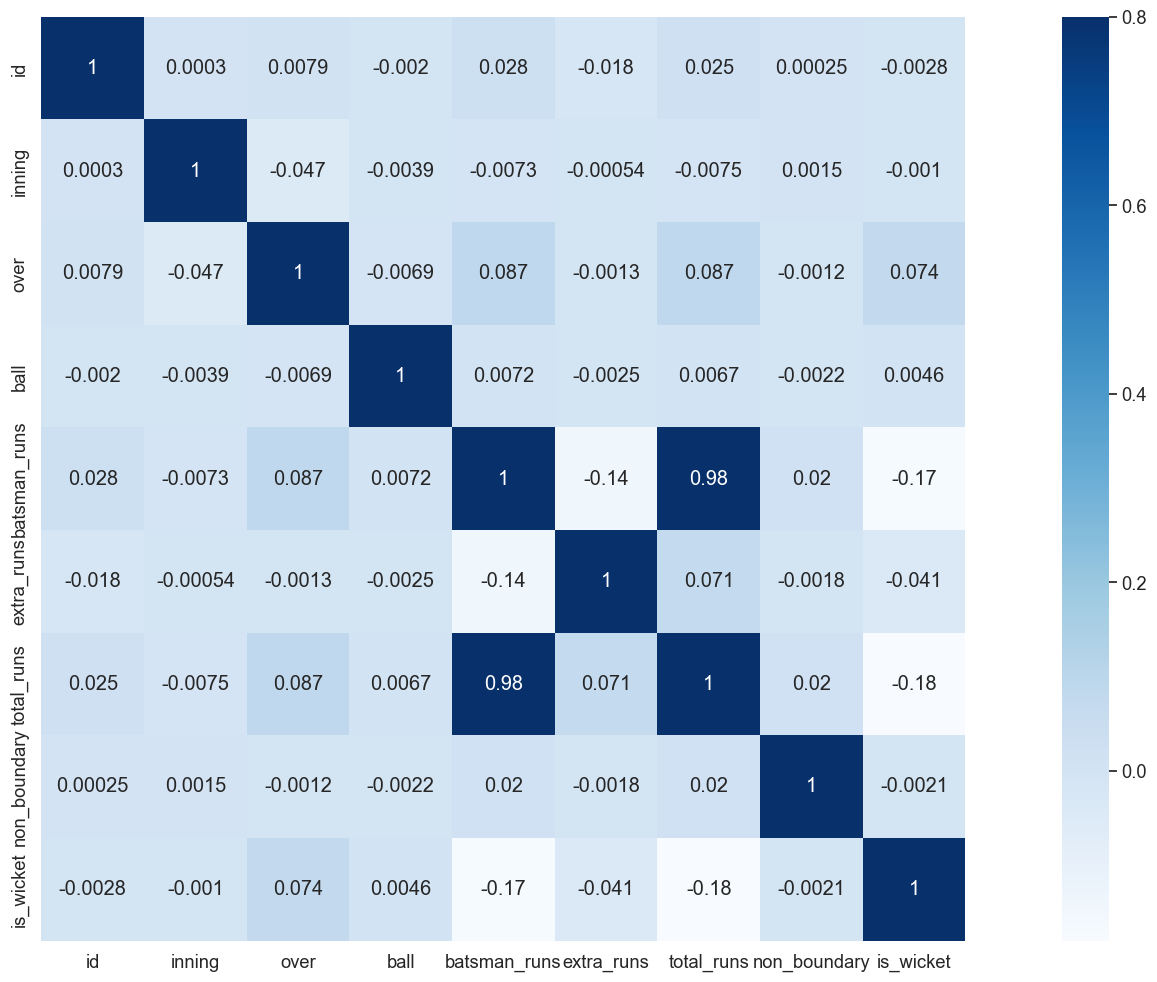

In [216]:
matrix = ball_by_ball.corr() 
f, ax = plt.subplots(figsize=(25, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="Blues", annot=True);


### 4.21 - Top 5 Umpire 

Text(0, 0.5, 'Top 5 Umpire 2')

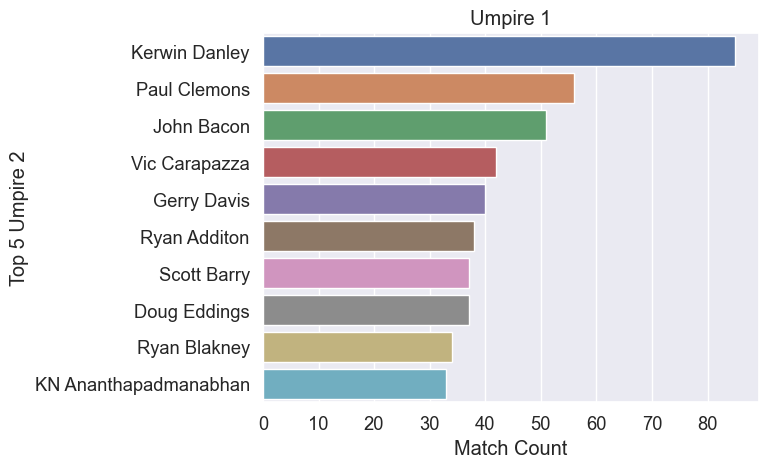

In [217]:
sns.barplot(x = matches_data['umpire1'].value_counts().head(10).values, y = matches_data['umpire1'].value_counts().head(10).index, data = matches_data)
plt.title("Umpire 1")
plt.xlabel("Match Count")
plt.ylabel("Top 5 Umpire 2")

Text(0, 0.5, 'Top 5 Umpire 2')

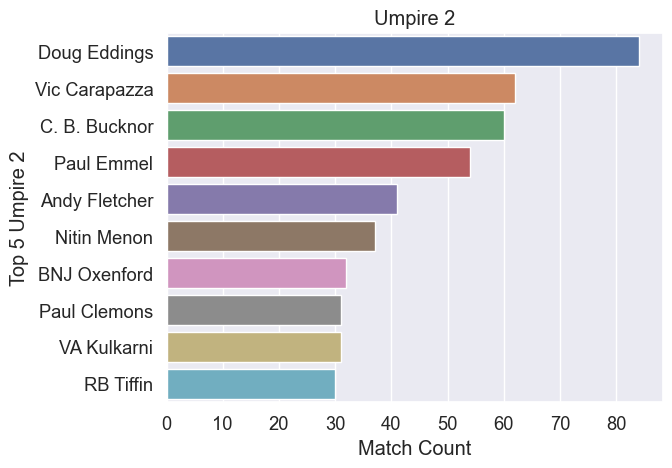

In [218]:
sns.barplot(x = matches_data['umpire2'].value_counts().head(10).values, y = matches_data['umpire2'].value_counts().head(10).index, data = matches_data)
plt.title("Umpire 2")
plt.xlabel("Match Count")
plt.ylabel("Top 5 Umpire 2")

### 4.22 - Cross Tab Plot

Toss Winner Vs Toss Decision

In [219]:
pd.crosstab(matches_data['toss_winner'],matches_data['toss_decision']).style.background_gradient(cmap = 'summer')

toss_decision,Hit,Pitch,bat,field
toss_winner,,,,
Arizona Diamondbacks,4,0,2,1
Atlanta Braves,14,17,24,51
Chicago Cubs,1,3,32,62
Cincinnati Reds,0,0,0,1
Cleveland Guardians Supergiant,0,0,0,6
Cleveland Guardians Supergiants,0,0,3,4
Houston Astros,0,1,1,13
Los Angeles Dodgers,0,0,7,13
Miami Marlins,2,0,23,18


Team1 Vs Team2

In [220]:
pd.crosstab(matches_data['team1'],matches_data['team2']).style.background_gradient(cmap = 'summer')

team2,Arizona Diamondbacks,Atlanta Braves,Chicago Cubs,Cleveland Guardians Supergiant,Cleveland Guardians Supergiants,Houston Astros,Los Angeles Dodgers,Miami Marlins,Milwaukee Brewers,New York Mets,Philadelphia Phillies,San Francisco Giants,Tampa Bay Rays,Washington Nationals
team1,,,,,,,,,,,,,,
Arizona Diamondbacks,0,0,1,0,0,0,0,1,1,1,1,1,0,1
Atlanta Braves,1,0,13,3,1,2,2,4,13,10,13,13,9,13
Chicago Cubs,1,14,0,1,1,2,2,3,13,12,14,12,9,11
Cleveland Guardians Supergiant,0,1,1,0,0,1,0,0,0,1,1,0,1,1
Cleveland Guardians Supergiants,0,1,1,0,0,1,0,0,0,1,1,0,1,1
Houston Astros,0,2,2,1,1,0,0,0,0,3,2,0,3,2
Los Angeles Dodgers,0,4,2,0,0,0,0,0,3,2,3,2,3,0
Miami Marlins,0,6,6,0,0,0,0,0,6,4,6,3,0,8
Milwaukee Brewers,1,9,9,0,0,0,1,3,0,11,8,10,7,11


Batsman vs The wickets they have taken 

In [221]:
pd.crosstab(ball_by_ball['batsman'],ball_by_ball['is_wicket']).style.background_gradient(cmap = 'seismic')

is_wicket,0,1
batsman,,
AJ Pollock,73,4
AJ Turner,8,3
AS Joseph,13,0
AT Carey,27,2
Aaron Ashby,10,1
Aaron Judge,329,29
Aaron Russell,832,50
Abel Cutting,821,61
Adam Cimber,382,18


Batsman and their total runs

In [222]:
pd.crosstab(ball_by_ball['batsman'],ball_by_ball['batsman_runs']).style.background_gradient(cmap = 'PRGn')

batsman_runs,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
batsman,,,,,,,
AJ Pollock,28,33,7,0,7,0,2
AJ Turner,8,3,0,0,0,0,0
AS Joseph,6,3,2,0,2,0,0
AT Carey,8,14,6,0,0,0,1
Aaron Ashby,5,5,1,0,0,0,0
Aaron Judge,152,137,20,0,33,0,16
Aaron Russell,357,259,32,0,105,0,129
Abel Cutting,311,382,60,0,67,0,62
Adam Cimber,156,148,25,1,58,0,12


### 4.23 - Cat Plot

####The team won both match and toss

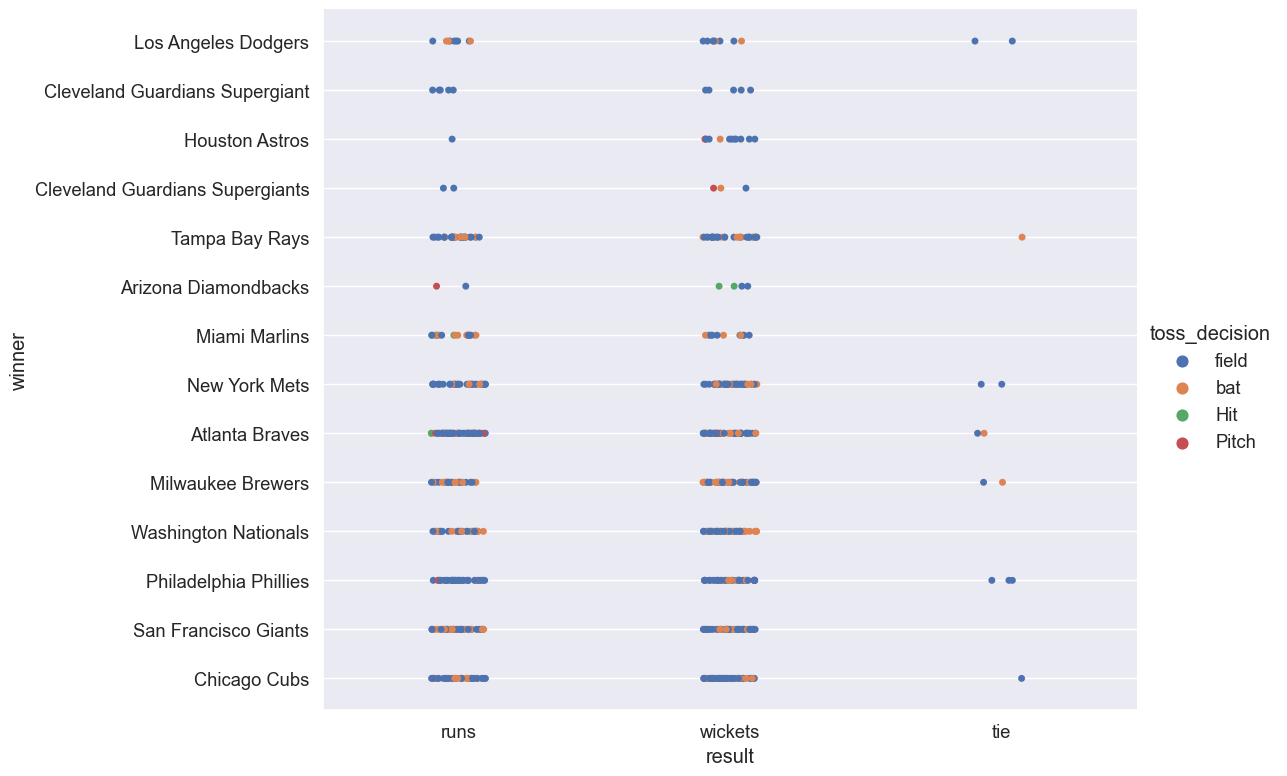

In [223]:
sns.catplot(x="result", y="winner", hue="toss_decision", data=matches_data, height=8, aspect=1.5)


## 4. Conclusion

*   The success rate of Cleveland Guardians is good competitively among the new teams.
*   New York Mets and San Francisco Giants are best defending team.
*   From the year 2014 most of the teams are opting to field after winning the toss and are also successful in winning matches.
*   Overall San Francisco Giants and New York Mets have high success rate.
*   From the analysis we can see that San Francisco Giants and New York Mets are more likely to win upcoming BaseBall seasons. 



To conclude, we found that there is likely a correlation between number of games played and number of games won. Additionally, it seems beneficial for teams to win the coin toss at the beginning of each game.  
